In [1]:
#This notebook is responsible to recreate the statistics, that other researchers like Nacke, Mandryk or C.Jennett used.
"""
MandryksStatistics calculates the average, min and max, and just for curiosity I also included the average change and prints them in the console.

Mandryk calculated those parameters on the raw EDA Data and the HR whereas Nacke used the same statistical parameters however, on the filtered
and corrected EDA data.

Jennett used the change in the fixations over time to infer the degree of immersion. Therefore we first checked how they increased or decreased over time
with JennettsStatistics.
Additionally to be able to compare our results to those of Jennett, we plotted scatterplots with the same scales and contents as the one
Jennett used in their paper, because they did not support any concrete numbers in their paper.

The values were printed in the console because I used Excel for further analysis. If you want to use dataframes and scipy or smth similar,
you  might want to create a new dataframe that contains:
Participant | Group | EDAData1 | EDAData2 | ... | ECGData1 | ECGData2| ... |
and write that to a csv, compare the Block:

"#Creating a DataFrame to visualize the EDA Data by writing it all in one dataframe and writing it to a csv"

from Visualizing.
"""

'German_Germany.1252'

In [ ]:
#Imports
import pandas as pd
import datetime
import neurokit as nk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import locale

locale.setlocale(locale.LC_ALL, "")

In [2]:
def getDFHandler_StatisticsFile(filePath):
    try:
        measurement_df = pd.read_csv(filePath, index_col = 0)
    except IOError:
        print("Could not open file, wrong path?")
    return measurement_df

In [6]:
def MandryksStatistics(column):
    
    PS_mean = ps[column].mean()
    print(column + " Mean of PS: " + locale.format("%.20f", PS_mean))
    
    PS_max = ps[column].max()
    print(column + " Max of PS: " + locale.format("%.20f", PS_max))
    
    PS_min = ps[column].min()
    print(column + " Min of PS: " + locale.format("%.20f", PS_min))
    
    PS_sdev = ps[column].std()
    print(column + " SDev of PS: " + locale.format("%.20f", PS_sdev))
    
    ps["shift"] = ps[column].shift(1)
    ps["diff"] = ps[column] - ps["shift"]
    PS_avgIncr = ps["diff"].mean()
    print(column + " Average Increase of PS: " + locale.format("%.20f", PS_avgIncr))
    print()
    
    PSVS_mean = psvs[column].mean()
    print(column + " Mean of PSVS: " + locale.format("%.20f", PSVS_mean))
    
    PSVS_max = psvs[column].max()
    print(column + " Max of PSVS: " + locale.format("%.20f", PSVS_max))
    
    PSVS_min = psvs[column].min()
    print(column + " Min of PSVS: " + locale.format("%.20f", PSVS_min))
    
    PSVS_sdev = psvs[column].std()
    print(column + " SDev of PSVS: " + locale.format("%.20f", PSVS_sdev))
    
    psvs["shift"] = psvs[column].shift(1)
    psvs["diff"] = psvs[column] - psvs["shift"]
    PSVS_avgIncr = psvs["diff"].mean()
    print(column + " Average Increase of PSVS: " + locale.format("%.20f", PSVS_avgIncr))
#MandryksStatistics("EDA_Tonic_MedianFiltered_Normalized")

In [32]:
MandryksStatistics("EDA_Raw")

EDA_Raw Mean of PS: 3,47968631667933125939
EDA_Raw Max of PS: 5,86000000000000031974
EDA_Raw Min of PS: 1,86000000000000009770
EDA_Raw SDev of PS: 0,82313250415130356785
EDA_Raw Average Increase of PS: 0,00000016666680555567

EDA_Raw Mean of PSVS: 2,79265898333277640120
EDA_Raw Max of PSVS: 5,17999999999999971578
EDA_Raw Min of PSVS: 0,10000000000000000555
EDA_Raw SDev of PSVS: 0,83855896112976335832
EDA_Raw Average Increase of PSVS: 0,00000300833584027987


C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  after removing the cwd from sys.path.
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  import sys
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  del sys.path[0]
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: This method will be removed in a future

In [27]:
lead = "H0"
i = 1
numOfParticipants = 23
#skipParticipants = [1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22]
skipParticipants = [1, 2, 4, 5, 6, 7, 8, 9, 13, 16, 18, 19, 20, 21]
while i <= numOfParticipants: 
    participant = lead + str(i).zfill(2)
    if not (i in skipParticipants):
        #do stuff
        print ("calculate stats for participant " + participant)
        PSPATH = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\" + participant + "\\PLUX\\PSStatistics_Normalized.csv"
        PSVSPATH = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\" + participant + "\\PLUX\\PSVSStatistics_Normalized.csv"
            
        ps = getDFHandler_StatisticsFile(PSPATH)
        psvs = getDFHandler_StatisticsFile(PSVSPATH)
            
        MandryksStatistics("Heart_Rate_MedianFiltered_Normalized")
    else:
        #skip participant
        print ("skipping participant " + participant + "\n")
    i += 1

skipping participant H001

skipping participant H002

calculate stats for participant H003


C:\Users\Alx-Wo\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  after removing the cwd from sys.path.
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  import sys
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: This method will be rem

Heart_Rate_MedianFiltered_Normalized Mean of PS: 0,39418823851275475167
Heart_Rate_MedianFiltered_Normalized Max of PS: 0,78666321314270615250
Heart_Rate_MedianFiltered_Normalized Min of PS: 0,04445159799371378034
Heart_Rate_MedianFiltered_Normalized SDev of PS: 0,15992384039164198040
Heart_Rate_MedianFiltered_Normalized Average Increase of PS: 0,00000009578947011023

Heart_Rate_MedianFiltered_Normalized Mean of PSVS: 0,34365176445037814990
Heart_Rate_MedianFiltered_Normalized Max of PSVS: 0,71832638326073561252
Heart_Rate_MedianFiltered_Normalized Min of PSVS: -0,01145774526898619278
Heart_Rate_MedianFiltered_Normalized SDev of PSVS: 0,16855556889083192496
Heart_Rate_MedianFiltered_Normalized Average Increase of PSVS: 0,00000019608502307535
skipping participant H004

skipping participant H005

skipping participant H006

skipping participant H007

skipping participant H008

skipping participant H009

calculate stats for participant H010
Heart_Rate_MedianFiltered_Normalized Mean of PS: 

In [8]:
def JennettsStatistics():
    #cropping to look only at values from 300 to 600s, as that is what jenett did in their paper.
    ps_avg_fixations = ps_fixations["Fixations"][300:600].mean()
    helper = pd.DataFrame(ps_fixations[300:600])
    helper["shifted"] = helper["Fixations"].shift(1)
    helper["difference"] = helper["Fixations"] - helper["shifted"]
    
    print("Average Fixations from 300 to 600s on PS: " + str(ps_avg_fixations))
    print("Tendency of Fixations/s from 300 to 600s on PS:" + str(helper["difference"].mean()))
    print("\n")
    
    
    psvs_avg_fixations = psvs_fixations["Fixations"][300:600].mean()
    helper = pd.DataFrame(psvs_fixations[300:600])
    helper["shifted"] = helper["Fixations"].shift(1)
    helper["difference"] = helper["Fixations"] - helper["shifted"]
    
    print("Average Fixations from 300 to 600s on PS_VS: " + str(psvs_avg_fixations))
    print("Tendency of Fixations/s from 300 to 600s on PS_VS:" + str(helper["difference"].mean()))
    print("\n")
    print("\n")
    
    
    
JennettsStatistics()

Average Fixations from 300 to 600s on PS: 2.763333333333333
Tendency of Fixations/s from 300 to 600s on PS:0.0033444816053511705


Average Fixations from 300 to 600s on PS_VS: 2.68
Tendency of Fixations/s from 300 to 600s on PS_VS:0.006688963210702341






In [13]:
#Using JennettsStatistics to calculate the averageChange per s for all participants at once.
lead = "H0"
i = 1
numOfParticipants = 23
skipParticipants = [3, 4, 5, 6, 15, 23]
while i <= numOfParticipants: 
    participant = lead + str(i).zfill(2)
    if not (i in skipParticipants):
        #do stuff
        print ("calculate stats for participant " + participant)
        PSPATH = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\" + participant + "\\Gazepoint\\result\\PS_Fixations.csv"
        PSVSPATH = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\" + participant + "\\Gazepoint\\result\\PS+VS_Fixations.csv"
            
        ps_fixations = getDFHandler_StatisticsFile(PSPATH)
        psvs_fixations = getDFHandler_StatisticsFile(PSVSPATH)
            
        JennettsStatistics()
    else:
        #skip participant
        print ("skipping participant " + participant + "\n")
    i += 1

calculate stats for participant H001
Average Fixations from 300 to 600s on PS: 2.7733333333333334
Tendency of Fixations/s from 300 to 600s on PS:0.0


Average Fixations from 300 to 600s on PS_VS: 2.25
Tendency of Fixations/s from 300 to 600s on PS_VS:-0.0033444816053511705




calculate stats for participant H002
Average Fixations from 300 to 600s on PS: 1.8478260869565217
Tendency of Fixations/s from 300 to 600s on PS:-0.01098901098901099


Average Fixations from 300 to 600s on PS_VS: 2.14
Tendency of Fixations/s from 300 to 600s on PS_VS:0.0




skipping participant H003

skipping participant H004

skipping participant H005

skipping participant H006

calculate stats for participant H007
Average Fixations from 300 to 600s on PS: 2.236666666666667
Tendency of Fixations/s from 300 to 600s on PS:-0.0033444816053511705


Average Fixations from 300 to 600s on PS_VS: 2.473333333333333
Tendency of Fixations/s from 300 to 600s on PS_VS:-0.0033444816053511705




calculate stats for participa

getting PSfixations for participant H001
getting PSfixations for participant H002
skipping participant H003

skipping participant H004

skipping participant H005

skipping participant H006

getting PSfixations for participant H007
getting PSfixations for participant H008
getting PSfixations for participant H009
getting PSfixations for participant H010
getting PSfixations for participant H011
getting PSfixations for participant H012
getting PSfixations for participant H013
skipping participant H014

skipping participant H015

getting PSfixations for participant H016
getting PSfixations for participant H017
getting PSfixations for participant H018
getting PSfixations for participant H019
getting PSfixations for participant H020
getting PSfixations for participant H021
getting PSfixations for participant H022
skipping participant H023

getting PSVSfixations for participant H001
getting PSVSfixations for participant H002
skipping participant H003

skipping participant H004

skipping partic

C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an ax

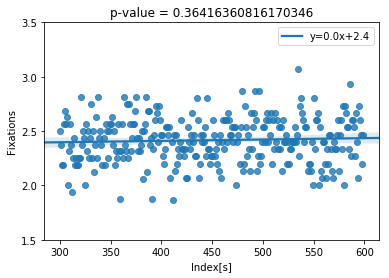

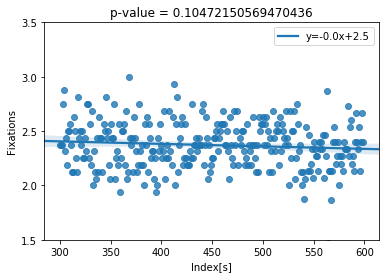

In [7]:
# trying to recreate the scatterplot from jennetts paper, where they did regression on the average fixations between 300 and 600s for all participants of a certain group.
from scipy import stats
#get all fixation data for group ps:
lead = "H0"
i = 1
numOfParticipants = 23
skipParticipants = [3, 4, 5, 6, 14, 15, 23]
listOfPSData = []
listOfPSVSData = []
while i <= numOfParticipants: 
    participant = lead + str(i).zfill(2)
    if not (i in skipParticipants):
        #do stuff
        print ("getting PSfixations for participant " + participant)
        PSPATH = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\" + participant + "\\Gazepoint\\result\\PS_Fixations.csv"
        
        PS_fixations = getDFHandler_StatisticsFile(PSPATH)[300:600]
        listOfPSData.append(PS_fixations)
    else:
        #skip participant
        print ("skipping participant " + participant + "\n")
    i += 1
averageValuesPS = pd.concat(listOfPSData).groupby(level=0).mean()

i = 1
while i <= numOfParticipants: 
    participant = lead + str(i).zfill(2)
    if not (i in skipParticipants):
        #do stuff
        print ("getting PSVSfixations for participant " + participant)
        PSVSPATH = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\" + participant + "\\Gazepoint\\result\\PSVS_Fixations.csv"
        
        PSVS_fixations = getDFHandler_StatisticsFile(PSVSPATH)[300:600]
        listOfPSVSData.append(PSVS_fixations)
    else:
        #skip participant
        print ("skipping participant " + participant + "\n")
    i += 1
averageValuesPSVS = pd.concat(listOfPSVSData).groupby(level=0).mean()

print("averageValuesPS: ")
print (averageValuesPS)

print("averageValuesPSVS: ")
print (averageValuesPSVS)


slopePS, interceptPS, r_valuePS, p_valuePS, std_errPS = stats.linregress(averageValuesPS["Index[s]"],averageValuesPS["Fixations"])

slopePSVS, interceptPSVS, r_valuePSVS, p_valuePSVS, std_errPSVS = stats.linregress(averageValuesPSVS["Index[s]"],averageValuesPSVS["Fixations"])


plt.figure()
PSPlot = sns.regplot(x = averageValuesPS["Index[s]"], y = averageValuesPS["Fixations"], data = averageValuesPS, 
                     line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slopePS,interceptPS)})
PSPlot.legend()
PSPlot.set_title("p-value = " + str(p_valuePS))
axis = plt.axes()

axis.set_ylim([1.5, 3.5])
axis.set_yticks(np.arange(1.5, 4, step=0.5))


PSPlot.get_figure().savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\FixationScatterPlots\\Fixations_PS_BetterScale2.png", dpi = 800)
plt.figure()
PSVSPlot = sns.regplot(x = averageValuesPSVS["Index[s]"], y = averageValuesPSVS["Fixations"], data = averageValuesPSVS, 
                      line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slopePSVS,interceptPSVS)})
PSVSPlot.legend()
PSVSPlot.set_title("p-value = " + str(p_valuePSVS))
axis = plt.axes()

axis.set_ylim([1.5, 3.5])
axis.set_yticks(np.arange(1.5, 4, step=0.5))


PSVSPlot.get_figure().savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\FixationScatterPlots\\Fixations_PSVS_BetterScale2.png", dpi = 800)
    